In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [6]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
logins.set_index('login_time',inplace=True)
logins['count'] = 1

In [8]:
intlogins = logins.resample('15T',label='right').sum()

In [9]:
intlogins.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [10]:
intlogins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [11]:
intlogins.shape

(9788, 1)

In [12]:
intlogins['time'] = pd.to_datetime(intlogins.index)
print(type(intlogins.time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
intlogins['day'] = intlogins.time.dt.day
intlogins['month'] = intlogins.time.dt.month
intlogins['hour'] = intlogins.time.dt.hour
intlogins['week'] = intlogins.time.dt.week
intlogins['weekday'] = intlogins.time.dt.weekday

In [15]:
intlogins.head()

,count,time,day,month,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3


By Day:

day
1     3183
2     3060
3     3443
4     4046
5     3232
6     3269
7     4025
8     4015
9     2839
10    3295
11    3851
12    3632
13    3004
14    3441
15    3327
16    2199
17    3074
18    2944
19    2843
20    2885
21    3489
22    3518
23    2234
24    2299
25    2355
26    2186
27    2708
28    3558
29    2194
30    1431
31    1563
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

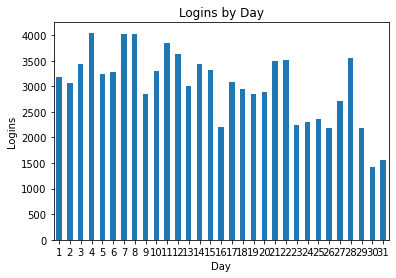

In [23]:
print(intlogins.groupby('day')['count'].aggregate(np.sum))
intlogins.groupby('day')['count'].sum().plot(kind='bar')
plt.title("Logins by Day")
plt.xlabel("Day")
plt.ylabel("Logins")
plt.xticks(rotation=0)

month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

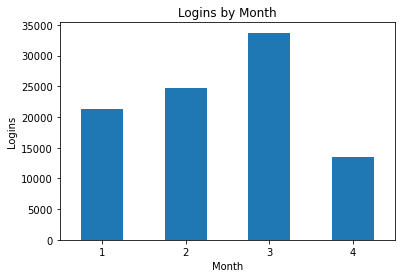

In [24]:
print(intlogins.groupby('month')['count'].aggregate(np.sum))
intlogins.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Logins by Month")
plt.xlabel("Month")
plt.ylabel("Logins")
plt.xticks(rotation=0)

weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

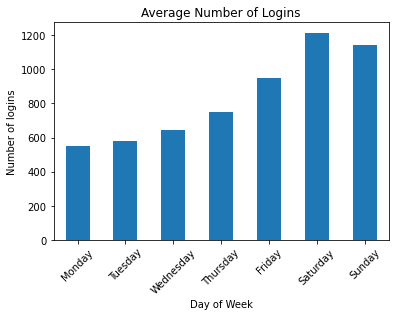

In [27]:
import calendar
nweek = 16
print(intlogins.groupby('weekday')['count'].aggregate(np.sum)/nweek)

byweek = (intlogins.groupby('weekday')['count'].sum()/nweek).plot(kind='bar')
plt.title("Logins by Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
byweek.set_xticklabels([calendar.day_name[d] for d in range(7)])

week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

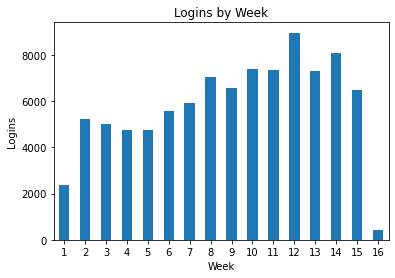

In [25]:
print(intlogins.groupby('week')['count'].aggregate(np.sum))
intlogins.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Logins by Week")
plt.xlabel("Week")
plt.ylabel("Logins")
plt.xticks(rotation=0)

hour
0     5988
1     6302
2     5961
3     5075
4     4722
5     3892
6     1381
7      854
8      766
9     1273
10    2523
11    5251
12    5483
13    3761
14    3432
15    3187
16    2864
17    2607
18    2845
19    3180
20    3769
21    5284
22    6524
23    6218
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

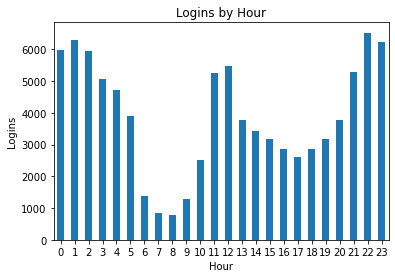

In [26]:
print(intlogins.groupby('hour')['count'].aggregate(np.sum))
intlogins.groupby('hour')['count'].sum().plot(kind='bar')
plt.title("Logins by Hour")
plt.xlabel("Hour")
plt.ylabel("Logins")
plt.xticks(rotation=0)